In [299]:
import numpy as np

In [300]:
import random

In [301]:
class Organism:
    def __init__(self,size,speed):
        self.size = size
        self.speed = speed
        self.agility = speed*(2/size)

In [302]:
population_size = 10
population = []

for i in range(population_size):
    size = random.randint(1,100)
    speed = random.randint(1,100)
    organism = Organism(size,speed)
    population.append(organism)

In [303]:
def fitness_function(organism):
    return organism.agility * organism.size * organism.speed

In [304]:
num_generations = 5000

for i in range(population_size):
    size = random.randint(1,100)
    speed = random.randint(1,100)
    organism = Organism(size,speed)
    population.append(organism)

for i in range(num_generations):
    fittest_organisms = sorted(population, key=fitness_function, reverse=True)[:2]
    newSize = (fittest_organisms[0].size + fittest_organisms[1].size) / 2
    newSpeed = (fittest_organisms[0].speed + fittest_organisms[1].speed) / 2
    newOrganism = Organism(newSize,newSpeed)
    population.append(newOrganism)
    population = sorted(population, key=fitness_function, reverse=True)[:population_size]


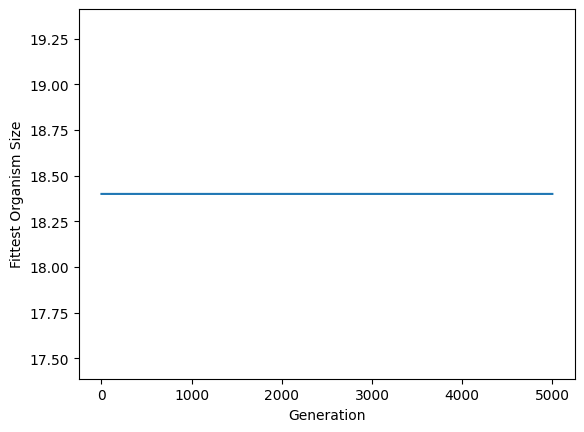

In [305]:
import matplotlib.pyplot as plt

fittest_agilities = []

for i in range(num_generations):
    fittest_organism = sorted(population, key=fitness_function, reverse=True)[0]
    fittest_agilities.append(fittest_organism.agility)
    
plt.plot(fittest_agilities)
plt.xlabel('Generation')
plt.ylabel('Fittest Organism Size')
plt.show()